In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("..")  # Add parent directory to the system path
import config
from io import StringIO
from itertools import product
import utils


COLAB=False

if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    curr_path = config.drive_path
else:
    curr_path = os.getcwd()
    
data_path = os.path.join(curr_path, "../", config.data_path)
proc_data_path = os.path.join(curr_path, "../", config.processed_data_path)

In [3]:
# retrieve the link_df, a df version of the dragonfly-link-stats file which holds link information 

link_file = os.path.join(data_path, config.link_file_dir, config.link_file_name)
lines = []

with open(link_file, 'r') as file:
    i = 0
    for line in file:
        if (line.startswith('#')):
            continue

        lines.append(line)
        i += 1

data_string = '\n'.join(lines)


link_df = pd.read_csv(StringIO(data_string), sep=' ', header=None)

link_df.columns = ['source_id', 'src_port_id', 'source_type', 'dest_id', 'dest_type', 'link_type', 'link_traffic', 'link_saturation', 'stalled_chunks']
link_df

,source_id,src_port_id,source_type,dest_id,dest_type,link_type,link_traffic,link_saturation,stalled_chunks
0,0,0,T,0,R,CN,31859008000,1.381947e+08,308027
1,1,0,T,0,R,CN,31859008000,3.534716e+08,681198
2,0,0,R,1,R,L,41903472870,6.754697e+08,0
3,0,1,R,2,R,L,34750494726,7.506144e+08,0
4,0,2,R,3,R,L,36937411628,1.540953e+09,0
...,...,...,...,...,...,...,...,...,...
319,35,2,R,34,R,L,36783097631,1.261883e+09,0
320,35,3,R,24,R,G,36427315904,5.500745e+08,0
321,35,4,R,28,R,G,40348428669,7.874640e+08,0
322,35,5,R,70,T,CN,31858752000,3.079592e+03,0


In [4]:
proc_data_path

'/Users/pietrolodirizzini/Desktop/network-predictive-analysis/scripts/../data/processed/72.milc36+lammps32+ur4.20240418'

In [5]:
#merged_df = pd.read_csv(os.path.join(proc_data_path, "merged_df_allPorts.csv"))
#merged_df = pd.read_csv(os.path.join(proc_data_path, "merged_df_allPorts_LAMMPS_4000.csv"))
#merged_df = pd.read_csv(os.path.join(proc_data_path, "merged_df_allPorts_LAMMPS_MILC_4000.csv"))
merged_df = pd.read_csv(os.path.join(proc_data_path, "merged_df_allPorts_MILC_4000.csv"))
merged_df

,iteration-duration,iteration,router-id,port-id,compute-node,bw-consumed-avg,bw-consumed-q25,bw-consumed-q75,bw-consumed-min,bw-consumed-max,...,downstream-credits-2-max,downstream-credits-3-max,vc-occupancy-0-last,vc-occupancy-1-last,vc-occupancy-2-last,vc-occupancy-3-last,downstream-credits-0-last,downstream-credits-1-last,downstream-credits-2-last,downstream-credits-3-last
0,1.665091e+06,0,19,6,1,91.140989,88.718959,92.079526,86.393810,97.074963,...,32768,32768,4096,0,0,0,24576,32768,32768,32768
1,1.665609e+06,0,19,0,0,91.892670,87.831435,96.003090,87.063227,97.188495,...,16384,16384,10240,0,0,0,8192,12288,12288,16384
2,1.665609e+06,0,19,1,0,94.555035,92.061361,97.716990,88.419233,99.832245,...,16384,16384,8192,5120,8192,0,4096,12288,16384,16384
3,1.665609e+06,0,19,2,0,88.223200,85.051854,89.106389,84.295727,96.681004,...,12288,16384,16384,0,4096,0,4096,16384,12288,16384
4,1.665609e+06,0,19,3,0,88.379709,84.453537,93.618461,80.820138,96.005982,...,16384,16384,0,12288,0,0,16384,4096,16384,16384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007995,1.614565e+06,3995,29,6,0,95.670186,92.715309,99.908738,88.355655,99.981399,...,32768,32768,20480,0,0,0,24576,32768,32768,32768
1007996,1.737897e+06,3996,29,6,0,95.206540,92.569987,98.092215,89.518229,99.400112,...,32768,32768,20480,0,0,0,28672,32768,32768,32768
1007997,1.689068e+06,3997,29,6,0,94.376129,91.698056,96.929641,88.355655,99.400112,...,32768,32768,61440,0,0,0,28672,32768,32768,32768
1007998,1.698041e+06,3998,29,6,0,93.635680,92.134022,95.694406,89.518229,97.074963,...,32768,32768,20480,0,0,0,28672,32768,32768,32768


In [6]:
merged_df[(merged_df['iteration'] == 1000) & (merged_df['router-id'] == 3)]

,iteration-duration,iteration,router-id,port-id,compute-node,bw-consumed-avg,bw-consumed-q25,bw-consumed-q75,bw-consumed-min,bw-consumed-max,...,downstream-credits-2-max,downstream-credits-3-max,vc-occupancy-0-last,vc-occupancy-1-last,vc-occupancy-2-last,vc-occupancy-3-last,downstream-credits-0-last,downstream-credits-1-last,downstream-credits-2-last,downstream-credits-3-last
757000,1.604404e+06,1000,3,0,0,81.105479,76.246652,88.464078,60.029825,93.391892,...,16384,16384,0,0,0,0,16384,16384,16384,16384
761000,1.604404e+06,1000,3,1,0,83.101931,76.475313,89.759486,68.814414,96.560660,...,16384,16384,0,0,0,0,16384,16384,16384,16384
765000,1.604404e+06,1000,3,2,0,78.326129,70.348843,90.845496,49.239113,94.389348,...,16384,16384,0,0,0,0,16384,16384,16384,16384
769000,1.604404e+06,1000,3,3,0,80.195333,78.414558,87.607439,53.396111,90.087454,...,16384,16384,0,0,0,0,16384,16384,16384,16384
773000,1.604404e+06,1000,3,4,0,89.194367,86.781240,97.276483,61.276413,99.518115,...,16384,16384,0,0,0,0,16384,16384,16384,16384
777000,1.604404e+06,1000,3,5,0,9.964923,9.445917,10.317848,9.300595,10.753813,...,32768,32768,0,0,0,0,32768,32768,32768,32768
781000,1.604404e+06,1000,3,6,0,41.283880,33.294729,49.497897,26.054609,58.473860,...,32768,32768,0,0,0,0,32768,32768,32768,32768


In [7]:
graph_node_id = 12
compute_node = 13
router = 6
port = 6
merged_df.loc[(merged_df['router-id']*7 + merged_df['port-id'] == graph_node_id) & (merged_df['iteration'] == 2)]


,iteration-duration,iteration,router-id,port-id,compute-node,bw-consumed-avg,bw-consumed-q25,bw-consumed-q75,bw-consumed-min,bw-consumed-max,...,downstream-credits-2-max,downstream-credits-3-max,vc-occupancy-0-last,vc-occupancy-1-last,vc-occupancy-2-last,vc-occupancy-3-last,downstream-credits-0-last,downstream-credits-1-last,downstream-credits-2-last,downstream-credits-3-last
557,1.693333e+06,2,1,5,0,35.758624,26.696175,45.284487,14.299296,53.800855,...,32768,32768,0,0,0,0,28672,32768,32768,32768


In [8]:
# create a tensor X which holds node features over time
# X: [num_timesteps, num_nodes, num_features]
# note: the 3rd axes (features) contain also the iteration-duration, the target for the prediction

X_array = []
Y_array = []

num_nodes = int(merged_df['router-id'].max()) * 7 + merged_df['port-id'].max() + 1 #nodes of the graph dataset to be built, not computing nodes
iterations = merged_df['iteration'].max()

node_features_type = ['bw-consumed',
                 'downstream-credits-0', 'downstream-credits-1', 'downstream-credits-2', 'downstream-credits-3',
                 'vc-occupancy-0', 'vc-occupancy-1', 'vc-occupancy-2', 'vc-occupancy-3']
#node_features_type = ['bw-consumed', 'downstream-credits-0', 'vc-occupancy-0']
#node_features_type = ['vc-occupancy-0', 'vc-occupancy-1', 'vc-occupancy-2', 'vc-occupancy-3']
#node_features_type = ['vc-occupancy-0']

features_aggregation = ['-avg', '-min', '-max', '-q25', '-q75']
#features_aggregation = ['-avg']

#node_features = ['compute-node',
#                 'downstream-credits-0-last', 'downstream-credits-1-last', 'downstream-credits-2-last', 'downstream-credits-3-last',
#                 'vc-occupancy-0-last', 'vc-occupancy-1-last', 'vc-occupancy-2-last', 'vc-occupancy-3-last']
node_features = ['iteration-duration']
#node_features = ['compute-node']
#node_features = []
jointModel = False
if jointModel:
  node_features_ext = [a + b for a, b in product(node_features_type, features_aggregation)]
  node_features.extend([a + b for a, b in product(node_features_ext, ['_milc', '_lammps'])])
else:
  node_features.extend([a + b for a, b in product(node_features_type, features_aggregation)])


#node_features = ['compute-node', 'iteration-duration']
node_targets = ['iteration-duration']
#node_targets.extend(node_features)
#node_targets.extend([a + b for a, b in product(node_features_type, features_aggregation)])

# determine active_nodes
active_nodes = []
for graph_node_id in range(num_nodes):
  flag = merged_df.loc[(merged_df['router-id']*7 + merged_df['port-id'] == graph_node_id) & (merged_df['iteration'] == 0)]['compute-node'].values[0]
  active_nodes.append(flag)
active_nodes = np.array(active_nodes)

for graph_node_id in range(num_nodes):
  filtered_data = merged_df.loc[merged_df['router-id']*7 + merged_df['port-id'] == graph_node_id].reset_index().sort_values(by="iteration")
  node_features_over_time = np.transpose(filtered_data[node_features].values)
  node_target_over_time = np.transpose(filtered_data[node_targets].values)
  X_array.append(node_features_over_time)
  Y_array.append(node_target_over_time)


X = np.array(X_array) #252, 46, 2000
X = np.transpose(X, (2, 0, 1)) #2000, 252, 46

Y = np.array(Y_array) #252, 2000, 1
Y = np.transpose(Y, (2, 0, 1)) #2000, 252, 1

# keep only active nodes in Y
#Y = Y[:, active_nodes == 1, :]

X.shape, Y.shape, active_nodes

((4000, 252, 46),
 (4000, 252, 1),
 array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1]))

In [9]:
# create tensors for DCRNN
# features and target tensors have shape:
# features: [num_snapshots, num_timesteps_in, num_nodes, num_features]
# target: [num_snapshots, num_timesteps_in, num_nodes, num_features]
# each snapshot in the features tensor corresponds to a snapshot in the target tensor that we want to predict

num_timesteps_in = 2
num_timesteps_out = 1

indices = [(i, i + num_timesteps_in + num_timesteps_out) for i in range(iterations - num_timesteps_in - num_timesteps_out + 1)]

features, target = [], []
for lb, ub in indices:
  features.append((X[lb : lb + num_timesteps_in, :, :]))
  #target.append((X[:, 0, lb + num_timesteps_in : ub]))
  target.append((Y[lb + num_timesteps_in : ub, :, :]))

features = np.array(features)
target = np.array(target)
print("features:", features.shape, "\ntargets:", target.shape)

features: (3997, 2, 252, 46) 
targets: (3997, 1, 252, 1)


In [10]:
# train, val, test splits for features and targets

x_offsets = np.sort(np.concatenate((np.arange(-num_timesteps_in + 1, 1, 1),)))
y_offsets = np.sort(np.arange(1, num_timesteps_out + 1, 1))

train_ratio = 0.25
test_ratio = 0.65
#train_ratio = 0
#test_ratio = 1
# the rest (train_ratio - test_ratio) is used for the validation split

num_samples = features.shape[0]
num_test = round(num_samples * test_ratio)
num_train = round(num_samples * train_ratio)
num_val = num_samples - num_test - num_train

# train
x_train, y_train = features[:num_train], target[:num_train]

# val
x_val, y_val = (
    features[num_train: num_train + num_val],
    target[num_train: num_train + num_val],
)
# test
x_test, y_test = features[-num_test:], target[-num_test:]

# find the path where to store the datasets
base_path = os.path.join(proc_data_path, "DCRNN")
if not os.path.exists(base_path):
    os.makedirs(base_path)
store_path = utils.get_next_subdir_name(base_path, f"{num_timesteps_in}in_{num_timesteps_out}out_{len(node_features)}features_{len(node_targets)}targets_")

# store the features names in a txt file
utils.write_strings_to_file(node_features, store_path, "features.txt")
# store the targets names in a txt file
utils.write_strings_to_file(node_targets, store_path, "targets.txt")


for cat in ["train", "val", "test"]:
    _x, _y = locals()["x_" + cat], locals()["y_" + cat]

    print(cat, "x: ", _x.shape, "y:", _y.shape)

    np.savez_compressed(
        os.path.join(store_path, f"{cat}.npz"),
        x=_x,
        y=_y,
        x_offsets=x_offsets.reshape(list(x_offsets.shape) + [1]),
        y_offsets=y_offsets.reshape(list(y_offsets.shape) + [1]),
    )

np.savez_compressed(
        os.path.join(store_path, "active_nodes.npz"),
        active_nodes=active_nodes
)

print(store_path)

train x:  (999, 2, 252, 46) y: (999, 1, 252, 1)
val x:  (400, 2, 252, 46) y: (400, 1, 252, 1)
test x:  (2598, 2, 252, 46) y: (2598, 1, 252, 1)
/Users/pietrolodirizzini/Desktop/network-predictive-analysis/scripts/../data/processed/72.milc36+lammps32+ur4.20240418/DCRNN/2in_1out_46features_1targets_5


In [11]:
# train, val, test splits for features and targets
# 2 separate test sets

x_offsets = np.sort(np.concatenate((np.arange(-num_timesteps_in + 1, 1, 1),)))
y_offsets = np.sort(np.arange(1, num_timesteps_out + 1, 1))

train_ratio = 0.7
test_ratio = 0.15
#train_ratio = 0
#test_ratio = 1
# the rest (train_ratio - test_ratio) is used for the validation split

num_samples = features.shape[0]
num_test = round(num_samples * test_ratio)
num_train = round(num_samples * train_ratio)
num_val = num_samples - num_test - num_train
'''split_num = 2000

# train
num_train_1 = split_num-round(0.5*(num_test + num_val))
x_train_1, y_train_1 = features[:num_train_1], target[:num_train_1]

num_train_2 = num_train-num_train_1
x_train_2, y_train_2 = features[split_num:split_num+num_train_2], target[split_num:split_num+num_train_1]

# val
num_val_1 = round(.5*num_val)
x_val_1, y_val_1 = (
    features[split_num: split_num+num_val_1],
    target[num_train: split_num+num_val_1],
)

# test
num_test_1 = round(0.5*num_test)
x_test, y_test = features[split_num: split_num+num_val_1+num_test_1], target[split_num: split_num+num_val_1+num_test_1]
'''
ub_train_1 = 500
lb_train_2, ub_train_2 = 2005, 2005+500
x_train_1, y_train_1 = features[:ub_train_1], target[:ub_train_1]
x_train_2, y_train_2 = features[lb_train_2:ub_train_2], target[lb_train_2:ub_train_2]
x_train = np.concatenate((x_train_1, x_train_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)

x_val_1, y_val_1 = features[1400:1700], target[1400:1700]
x_val_2, y_val_2 = features[3400:3700], target[3400:3700]
x_val = np.concatenate((x_val_1, x_val_2), axis=0)
y_val = np.concatenate((y_val_1, y_val_2), axis=0)

x_test_1, y_test_1 = features[1700:2000], target[1700:2000]
x_test_2, y_test_2 = features[3700:4000], target[3700:4000]
x_test = np.concatenate((x_test_1, x_test_2), axis=0)
y_test = np.concatenate((y_test_1, y_test_2), axis=0)


# find the path where to store the datasets
base_path = os.path.join(proc_data_path, "DCRNN")
if not os.path.exists(base_path):
    os.makedirs(base_path)
store_path = utils.get_next_subdir_name(base_path, f"{num_timesteps_in}in_{num_timesteps_out}out_{len(node_features)}features_{len(node_targets)}targets_")

# store the features names in a txt file
utils.write_strings_to_file(node_features, store_path, "features.txt")
# store the targets names in a txt file
utils.write_strings_to_file(node_targets, store_path, "targets.txt")


for cat in ["train", "val", "test"]:
    _x, _y = locals()["x_" + cat], locals()["y_" + cat]

    print(cat, "x: ", _x.shape, "y:", _y.shape)

    np.savez_compressed(
        os.path.join(store_path, f"{cat}.npz"),
        x=_x,
        y=_y,
        x_offsets=x_offsets.reshape(list(x_offsets.shape) + [1]),
        y_offsets=y_offsets.reshape(list(y_offsets.shape) + [1]),
    )

np.savez_compressed(
        os.path.join(store_path, "active_nodes.npz"),
        active_nodes=active_nodes
)

train x:  (1000, 2, 252, 46) y: (1000, 1, 252, 1)
val x:  (600, 2, 252, 46) y: (600, 1, 252, 1)
test x:  (597, 2, 252, 46) y: (597, 1, 252, 1)


KeyboardInterrupt: 

In [ ]:
store_path

'/Users/pietrolodirizzini/Desktop/network-predictive-analysis/scripts/../data/processed/72.milc36+lammps32+ur4.20240418/DCRNN/2in_1out_46features_1targets_4'

In [ ]:
# Reshape the features tensor to 2D [num_records * num_timesteps_in, num_nodes * num_features]
X_reshaped = X.reshape(36, -1, X.shape[1] * X.shape[3])

# Reshape the target tensor to 2D [num_records * num_timesteps_in, num_nodes]
y_reshaped = Y.reshape(36, 1997, -1)

X_reshaped.shape, y_reshaped.shape

IndexError: tuple index out of range

In [ ]:
X_train.shape

(1597, 2, 1620)

In [ ]:
from cmath import sqrt
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Define MinMaxScaler class
class MinMaxScaler:
    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, data):
        self.min = data.min()
        self.max = data.max()

    def transform(self, data):
        scaled_data = (data - self.min) / (self.max - self.min)
        return scaled_data

    def inverse_transform(self, scaled_data):
        original_data = scaled_data * (self.max - self.min) + self.min
        return original_data

# Assuming you have features tensor `X` and target tensor `y`
# X.shape = [num_records, num_timesteps_in, num_nodes, num_features]
# y.shape = [num_records, 1, num_nodes, 1]

# Reshape the features tensor to 2D [num_records * num_timesteps_in, num_nodes * num_features]
#X_reshaped = X.reshape(-1, X.shape[2] * X.shape[3])

# Reshape the target tensor to 2D [num_records * num_timesteps_in, num_nodes]
#y_reshaped = y[:, 0, :, 0].reshape(-1, y.shape[2])

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped.transpose(1, 0, 2), y_reshaped.transpose(1, 0, 2), test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.transpose(1, 0, 2)
X_test = X_test.transpose(1, 0, 2)
y_train = y_train.transpose(1, 0, 2)
y_test = y_test.transpose(1, 0, 2)

# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(np.concatenate((np.reshape(X_train, -1), np.reshape(y_train, -1))).reshape(-1, 1))


# Normalize features and target using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

# Initialize a dictionary to hold XGBoost regressors for each node
regressors = {}

# Train XGBoost regressor for each node
for node_idx in range(36):
    #print(f"Training XGBoost regressor for node {node_idx}")
    # Initialize XGBoost regressor
    regressor = xgb.XGBRegressor(objective='reg:squarederror')
    
    # Train on reshaped data for the current node
    regressor.fit(X_train_scaled[node_idx, ...], y_train_scaled[node_idx, ...])
    
    # Save trained regressor
    regressors[node_idx] = regressor

# Make predictions for each node
predictions = np.zeros_like(y_test_scaled)
for node_idx, regressor in regressors.items():
    predictions[node_idx] = regressor.predict(X_test_scaled[node_idx, ...]).reshape(400, 1)


# Compute total test loss
total_loss = mean_absolute_percentage_error(y_test_scaled.reshape(-1), predictions.reshape(-1))
print(f"Total Test Loss: {total_loss}")

total_loss = np.sqrt(mean_squared_error(y_test_scaled.reshape(-1), predictions.reshape(-1)))
print(f"Total Test Loss: {total_loss}")


NameError: name 'X_reshaped' is not defined

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define MinMaxScaler class
class MinMaxScaler:
    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, data):
        self.min = data.min()
        self.max = data.max()

    def transform(self, data):
        scaled_data = (data - self.min) / (self.max - self.min)
        return scaled_data

    def inverse_transform(self, scaled_data):
        original_data = scaled_data * (self.max - self.min) + self.min
        return original_data

# Assuming you have features tensor `X` and target tensor `y`
# X.shape = [num_records, num_timesteps_in, num_nodes, num_features]
# y.shape = [num_records, num_timesteps_out, num_nodes, 1]

# Reshape the features tensor to 3D [num_records, num_timesteps_in, num_nodes * num_features]
X_reshaped = X.reshape(X.shape[0], X.shape[1], -1)

# Reshape the target tensor to 2D [num_records * num_timesteps_out, num_nodes]
y_reshaped = Y[:, :, :, 0].reshape(Y.shape[0], -1)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.75, random_state=42, shuffle=False)

# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(np.concatenate((np.reshape(X_train, -1), np.reshape(y_train, -1))).reshape(-1, 1))

# Normalize features and target using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

# Define LSTM model
model = Sequential([
    LSTM(units=64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dense(units=y_train_scaled.shape[1])
])

# Compile the model
model.compile(optimizer=Adam(), loss='mse')

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=32, verbose=1)

# Make predictions
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions_scaled)

# Compute total test loss
total_loss_mae = mean_absolute_percentage_error(y_test.reshape(-1), predictions.reshape(-1))
print(f"Total Test Loss (MAE): {total_loss_mae}")

total_loss_rmse = np.sqrt(mean_squared_error(y_test.reshape(-1), predictions.reshape(-1)))
print(f"Total Test Loss (RMSE): {total_loss_rmse}")


IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [ ]:
predictions[0].shape, y_test_scaled[0].shape

((36,), (36,))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Load the npz file

# Access the predictions and ground truth arrays
predictions = predictions[0].reshape(-1).tolist()
ground_truths = y_test_scaled[0].reshape(-1).tolist()

lb = 0 
ub=len(predictions)
predictions = predictions[lb:ub]#[0:200]
ground_truths = ground_truths[lb:ub]#[0:200]

plt.figure(figsize=(20, 5))

# Plot predictions[0] vs ground_truths[0]
plt.plot(predictions, label='Prediction')
plt.plot(ground_truths, label='Ground Truth')
plt.xlabel("Test Data Iteration Index")
plt.ylabel("Application Iteration Time")
plt.title("Predictions vs Ground Truth for Node 5")
plt.legend()

# Set major and minor ticks
'''plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(.05))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(.05))
'''
plt.grid(which='both', axis='both', linewidth=0.5)  # Add grid with specified parameters
plt.show()

NameError: name 'predictions' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_train is a PyTorch tensor

# Extract the values from the tensor
for node in [5, 6]:
    y_values = list(y_train[:, 0, node, 0])  # Assuming y_train is a PyTorch tensor
    #y_values.extend(y_val[:, 0, node, 0])
    #y_values.extend(y_test[:, 0, node, 0])


    # Plot the values
    plt.figure(figsize=(10, 6))
    plt.plot(y_values, label=f"y_train[:, 0, {node}, 0]")
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(f"Plot of y_train[:, 0, {node}, 0]")
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract the values from the tensor
for node in [0, 1, 5, 6]:
    feature_num = 2
    y_values = list(x_train[:, x_train.shape[1] - 1, node, feature_num])  # Assuming y_train is a PyTorch tensor
    #y_values.extend(x_val[:, 0, node, feature_num])
    #y_values.extend(x_test[:, 0, node, feature_num])


    # Plot the values
    plt.figure(figsize=(10, 6))
    plt.plot(y_values, label=f"x_train[:, {x_train.shape[1] - 1}, {node}, {feature_num}]")
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(f"Plot of x_train[:, {x_train.shape[1] - 1}, {node}, {feature_num}]")
    plt.legend()
    plt.grid(True)
    plt.show()


NameError: name 'y_train' is not defined

In [ ]:
# construct sparse edge_index tensor
# [[n1, n2] [n1, n2] ...]

num_routers = int(merged_df['router-id'].max()) + 1
num_ports = int(merged_df['port-id'].max()) + 1
num_routers_per_group = 4
num_ports_per_router = 7

edge_index = []


# connect all the ports within the same router
# (edge_index) has 7*6 * 4 routers * 9 groups = 1512 edges after this step
for router_id in range(num_routers):
  for port_id_i in range(num_ports):
    for port_id_j in range(num_ports):
      if port_id_i != port_id_j:
        graph_node_id_i = router_id * num_ports_per_router + port_id_i
        graph_node_id_j = router_id * num_ports_per_router + port_id_j
        edge_index.append([graph_node_id_i, graph_node_id_j])
'''
  # id of the 1st router in the group the current router_id belongs to
  first_router_id = router_id % num_routers_per_group + router_id // num_routers_per_group * num_routers_per_group

  if first_router_id % num_routers_per_group == 0:
    # id of the 1st node (graph node, corresponding to the router's port) of the 1st router in the first group
    first_node_of_first_router_id = first_router_id * num_ports_per_router

    # id of the 1st node (graph node) in the current router
    first_node_id = router_id * num_ports_per_router

    inter_group_connections = [[2, 9], [3, 16], [4, 23], [10, 17], [11, 24], [18, 25]]
    for port_id_i, port_id_j in inter_group_connections:
      i = first_node_of_first_router_id + port_id_i
      j = first_node_of_first_router_id + port_id_j
      edge_index.append([i, j])
      edge_index.append([j, i])
'''
print(len(edge_index))
# this step extracts the local and global links from the link_df
# and results in 6*9*2 (local) + 8*9 (global) edges added to edge_index
link_df_filtered = link_df[(link_df['link_type'] == 'L') | (link_df['link_type'] == 'G')]
result_df = pd.merge(
    link_df_filtered,
    link_df_filtered,
    left_on=['dest_id', 'source_id', 'link_type'],
    right_on=['source_id', 'dest_id', 'link_type'],
    suffixes=('_s', '_d')
)
result_df['source_node_id'] = result_df['source_id_s'] * 7 + result_df['src_port_id_s']
result_df['destination_node_id'] = result_df['source_id_d'] * 7 + result_df['src_port_id_d']

#print(result_df[['destination_node_id', 'source_node_id']].values)

edge_index.extend(result_df[['destination_node_id', 'source_node_id']].values)

len(edge_index)

1512


1692

In [ ]:
import torch
from torch_geometric.utils import to_dense_adj, dense_to_sparse
import pickle

# Convert sparse edge index to dense adjacency matrix
adj_dense = to_dense_adj(torch.tensor(edge_index).T)

shape = adj_dense.shape
adj_dense = adj_dense.reshape(shape[1], shape[2])

# Save to pickle file.
adj_matrix_file = os.path.join(proc_data_path, "adj.pkl")
with open(adj_matrix_file, 'wb') as f:
    pickle.dump([range(shape[0]), {i: i for i in range(shape[0])}, adj_dense], f, protocol=2)

/Users/pietrolodirizzini/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/my/qsffx9d93fsclc0gdv4qd5840000gn/T/ipykernel_34876/2134481324.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  adj_dense = to_dense_adj(torch.tensor(edge_index).T)


In [ ]:
from DCRNN_PyTorch.lib.utils import *
torch.set_printoptions(threshold=float('inf'))
l = torch.tensor(calculate_dual_random_walk_matrix(adj_dense).toarray())
l

NameError: name 'calculate_dual_random_walk_matrix' is not defined

In [16]:
active_nodes_milc = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1])
active_nodes_lammps = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])




32

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

class MinMaxScaler:
    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, data):
        self.min = data.min()
        self.max = data.max()

    def transform(self, data):
        scaled_data = (data - self.min) / (self.max - self.min)
        return scaled_data

    def inverse_transform(self, scaled_data):
        original_data = scaled_data * (self.max - self.min) + self.min
        return original_data

# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(X.reshape(-1, 1))

# Define the number of time steps to consider for prediction
timesteps = 2
out_t = 1

active_nodes_ = active_nodes_milc
# Filter Y to contain only active nodes
Y_filtered = Y[:, active_nodes_ == 1, :]

# Normalize features and target using the fitted scaler
Y_filtered = scaler.transform(Y_filtered)

# Prepare data for LSTM
X_ = []
Y_target = []
for i in range(len(Y_filtered) - timesteps - out_t + 1):  
    X_.append(Y_filtered[i:i+timesteps])
    Y_target.append(Y_filtered[i+timesteps:i+timesteps+out_t])  

# Convert lists to numpy arrays
X_ = np.array(X_)
Y_target = np.array(Y_target)

# Split data into training and testing sets
split = int(0.25 * len(X_))
X_train, X_test = X_[:split], X_[split:]
Y_train, Y_test = Y_target[:split], Y_target[split:]

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(timesteps, X_.shape[2])),
    Dense(len(np.where(active_nodes_ == 1)[0])*out_t)  # Output dimension should match the number of nodes
])

# Compile the model
model.compile(optimizer='adam', loss='mape')

Y_train_reshaped = np.reshape(Y_train, (Y_train.shape[0], -1))
#X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
Y_test_reshaped = np.reshape(Y_test, (Y_test.shape[0], -1))
#X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))

# Train the model
model.fit(X_train, Y_train_reshaped, epochs=10, batch_size=32, validation_data=(X_test, Y_test_reshaped))

# Evaluate the model
loss = model.evaluate(X_test, Y_test_reshaped)
print("Test Loss:", loss)


Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 39.0614 - val_loss: 16.1640
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 7.1972 - val_loss: 15.0104
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 5.8302 - val_loss: 14.2393
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 5.5789 - val_loss: 14.5757
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 5.5468 - val_loss: 14.1694
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 5.8159 - val_loss: 17.3068
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 5.6272 - val_loss: 16.1341
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 5.5588 - val_loss: 16.9906
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 5.4215 - val_loss: 17.6830
Epoch 10/10
94/94 [==============================] - 0s 468us/step - loss: 16.5299
Test Loss: 16.52988624572

In [17]:
active_nodes_id = np.where(active_nodes == 1)[0]
active_nodes_id_milc = np.where(active_nodes_milc == 1)[0]
active_nodes_id_lammps = np.where(active_nodes_lammps == 1)[0]


In [ ]:
active_nodes_id = np.where(active_nodes == 1)[0]

# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(X.reshape(-1, 1))

Y_scaled = scaler.transform(Y)

all_iter = []
all_pred = []
lookahead = 3

for node in active_nodes_id:
    node_iterations = Y_scaled[:, node, :].reshape(-1) #4000,
    node_predictions = [0 for _ in range(lookahead)]
    for i in range(lookahead, len(node_iterations), lookahead):
        for _ in range(lookahead):
            if len(node_predictions) < len(node_iterations):
                node_predictions.append(node_iterations[i - 1])
    node_predictions = np.array(node_predictions)

    all_iter.append(node_iterations)
    all_pred.append(node_predictions)
    mape = mean_absolute_percentage_error(all_iter, all_pred)
    #print(mape)
    
all_iter = np.array(all_iter)
all_pred = np.array(all_pred)
mape = mean_absolute_percentage_error(all_iter, all_pred)
mape

0.11486256776634367

In [ ]:
X[:, :, 0].max()

36430562.670627594

In [ ]:
# heuristic MEAN
active_nodes_id = np.where(active_nodes == 1)[0]

# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(X.reshape(-1, 1))

Y_scaled = scaler.transform(Y)

all_iter = []
all_pred = []
lookahead = 1
n_avg = 10

for node in active_nodes_id:
    node_iterations = Y_scaled[:, node, :].reshape(-1) #4000,
    node_predictions = [0.0001 for _ in range(lookahead+n_avg)]
    for i in range(n_avg, len(node_iterations)-lookahead, lookahead):
        for _ in range(lookahead):
            pred = np.mean(node_iterations[i-n_avg:i])
            if len(node_predictions) < len(node_iterations):
                node_predictions.append(pred)
    node_predictions = np.array(node_predictions)

    all_iter.append(node_iterations)
    all_pred.append(node_predictions)
    mape = mean_absolute_percentage_error(all_iter, all_pred)
    #print(mape)
    
all_iter = np.array(all_iter)
all_pred = np.array(all_pred)
mape = mean_absolute_percentage_error(all_iter, all_pred)
rmse = np.sqrt(mean_squared_error(all_iter, all_pred)) 
rmse, mape

(0.06771232313756036, 0.15676839284110827)

In [ ]:
# heuristic LAST

active_nodes_id = np.where(active_nodes == 1)[0]

# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(X.reshape(-1, 1))

Y_scaled = scaler.transform(Y)

all_iter = []
all_pred = []
horizon = 1

for node in active_nodes_id:
    node_iterations = Y_scaled[:, node, :].reshape(-1) #4000,
    node_predictions = [0.000001 for _ in range(horizon)]
    for i in range(1, len(node_iterations), horizon):
        for _ in range(horizon):
            if len(node_predictions) < len(node_iterations):
                node_predictions.append(node_iterations[i - 1])
    node_predictions = np.array(node_predictions)

    all_iter.append(node_iterations)
    all_pred.append(node_predictions)
    mape = mean_absolute_percentage_error(all_iter, all_pred)
    #print(mape)
    
all_iter = np.array(all_iter)
all_pred = np.array(all_pred)
mape = mean_absolute_percentage_error(all_iter, all_pred)
rmse = np.sqrt(mean_squared_error(all_iter, all_pred)) 
rmse, mape

(0.04257116679453274, 0.08626622539412154)

In [22]:
# LSTM
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler on training data
scaler.fit(X.reshape(-1, 1))

Y_scaled = scaler.transform(Y)
all_iter = []

'''for lb, ub in [(0, 1000), (1000, 4000)]:
    for node in active_nodes_id:
        node_iterations = Y_scaled[:, node, lb:ub].reshape(-1) #4000,

        all_iter.extend(node_iterations)'''
for node in active_nodes_id_milc:
        node_iterations = Y_scaled[:, node, :].reshape(-1) #4000,

        all_iter.extend(node_iterations)
        
all_iter = np.array(all_iter)

# Generate sample data (replace this with your own data)
a = 2  # Number of input values
b = 1   # Number of output values
data = all_iter

# Prepare the data
X_, y = [], []
for i in range(len(data) - a - b):
    X_.append(data[i:i+a])
    y.append(data[i+a:i+a+b])
X_ = np.array(X_)
y = np.array(y)

# Reshape data for LSTM input: [samples, timesteps, features]
X_ = X_.reshape(X_.shape[0], a, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.1, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(a, 1)))
model.add(Dense(b))  # Output layer with 'b' units

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Assuming you have trained your model and made predictions on the test set
predictions = model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("MAPE:", mape)
print("RMSE:", rmse)


Epoch 1/5
4050/4050 [==============================] - 5s 976us/step - loss: 0.0038 - val_loss: 4.2100e-04
Epoch 2/5
4050/4050 [==============================] - 4s 986us/step - loss: 4.1443e-04 - val_loss: 5.3809e-04
Epoch 3/5
4050/4050 [==============================] - 4s 943us/step - loss: 4.0590e-04 - val_loss: 4.7944e-04
Epoch 4/5
4050/4050 [==============================] - 4s 987us/step - loss: 3.9971e-04 - val_loss: 4.0784e-04
Epoch 5/5
450/450 [==============================] - 0s 390us/step
MAPE: 0.016396658591438417
RMSE: 0.02034135880209912


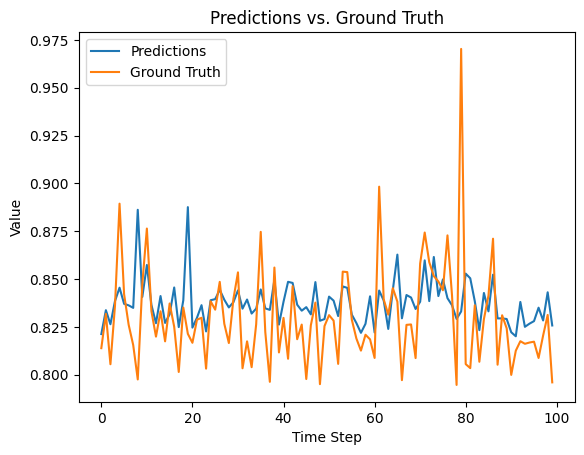

In [19]:
import matplotlib.pyplot as plt

# Concatenate all predictions and ground truth values
all_predictions = np.concatenate(predictions)
all_ground_truth = np.concatenate(y_test)

lb = 0
ub = lb+100
# Plot predictions vs. ground truth
plt.plot(all_predictions[lb:ub], label='Predictions')
plt.plot(all_ground_truth[lb:ub], label='Ground Truth')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Predictions vs. Ground Truth')
plt.legend()
plt.show()


In [20]:
## plots

import pickle
import numpy as np
import torch
#with open("../2024-04-27_22_06_45onlineTuning_tuned.npz", 'rb') as f:
#with open("../2024-04-27_22_24_37onlineTuning_tuned.npz", 'rb') as f:
with open("../2024-04-27_23_09_12onlineTuning_tuned.npz", 'rb') as f: #milc
    #with open("../2024-04-28_03_49_54onlineTuning_tuned.npz", 'rb') as f:
    data_tuned = pickle.load(f)


In [ ]:
len(data_tuned['pred'])

200

4/4 [==============================] - 0s 937us/step
97
100
100


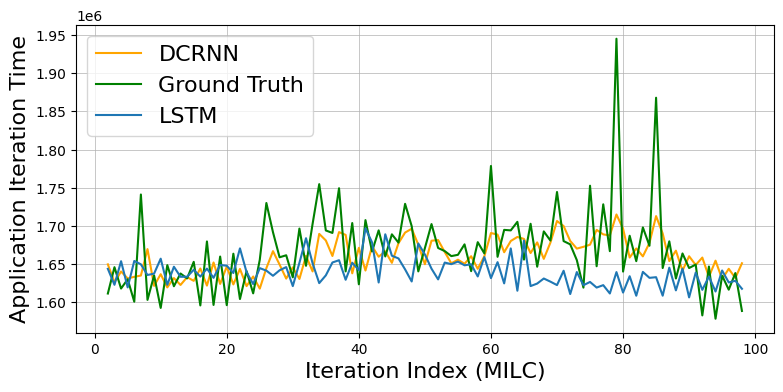

ValueError: Expected input data to be non-empty.

<Figure size 900x400 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import random

scaler_ = MinMaxScaler()
scaler_.min = 0.0
scaler_.max = 2526442.5985459983

node = 0
steps = 3
node_pred = []
node_gt = []
for i in range(len(data_tuned['pred'])):
    pred = data_tuned['pred'][i][node] #+ random.uniform(-0.04, 0.01)

    node_pred.append(pred)

    if i < len((data_tuned['gt'])):
        node_gt.append(data_tuned['gt'][i].tolist()[0][0][node])

for i in range(len(node_pred) - 1):
    node_pred[i], node_pred[i + 1] = node_pred[i + 1], node_pred[i]


for (min, max) in [(100, 200), (200, 400)]:
    #for (min, max) in [(25, 75)]:
    plt.figure(figsize=(9, 4))
    #rmse = compute_rmse(np.array(node_pred), np.array(node_gt))
    #mape = compute_mape(node_pred, node_gt)
    #print(rmse, mape)
    node_pred_ = node_pred[min:max]
    #if min==800:
    #    node_pred_[-1] = .85
    node_gt_ = node_gt[min:max]

    X_lstm = []
    for i in range(len(node_gt_) - a - b):
        X_lstm.append(data[i:i+a])
    X_lstm = np.array(X_lstm)
    X_lstm = X_lstm.reshape(X_lstm.shape[0], a, 1)
    node_pred_lstm = model.predict(X_lstm).reshape(-1)

    print(len(node_pred_lstm))
    print(len(node_pred_))
    print(len(node_gt_))
    font=16

    # Plot predictions[0] vs ground_truths[0]
    #plt.plot(range(min, max-6), scaler.inverse_transform(node_pred_lstm[:]), label='LSTM')
    plt.plot(range(a, max-b-min), scaler.inverse_transform(np.array(node_pred_)[:-3]), label='DCRNN', color="orange")
    plt.plot(range(a, max-b-min), scaler.inverse_transform(np.array(node_gt_)[:-3]), label='Ground Truth', color="g")
    plt.plot(range(a, max-b-min), scaler.inverse_transform(node_pred_lstm[:]), label='LSTM')
    #plt.plot(range(min, max), np.array(node_pred_), label='DCRNN')
    #plt.plot(range(min, max), np.array(node_gt_), label='Ground Truth')
    plt.xlabel("Iteration Index (MILC)", fontsize=font)
    plt.ylabel("Application Iteration Time", fontsize=font)
    #plt.title(f"Application Iteration time - Node {node}")
    plt.legend(fontsize=font)

    # Set major and minor ticks
    '''plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(.05))
    plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
    plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(.05))
    '''
    plt.grid(which='both', axis='both', linewidth=0.5)  # Add grid with specified parameters
    plt.show()


    

In [27]:
a, b

(2, 1)

7/7 [==============================] - 0s 692us/step
197
200
200


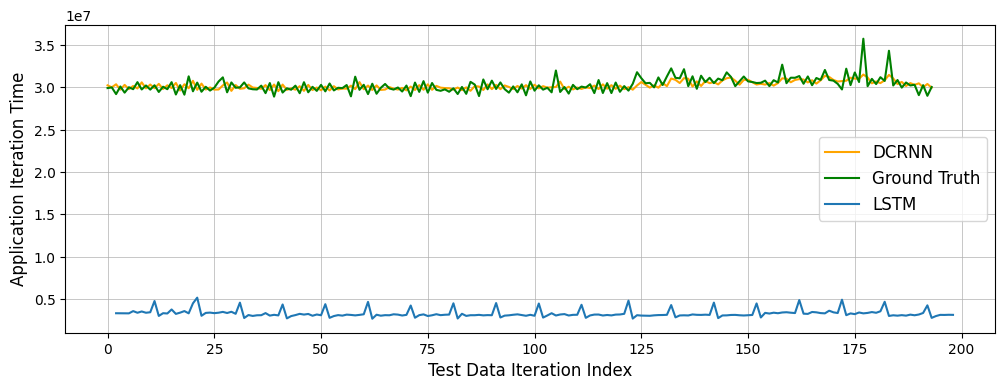

ValueError: Expected input data to be non-empty.

<Figure size 1200x400 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import random

scaler_ = MinMaxScaler()
scaler_.min = 0.0
scaler_.max = 2526442.5985459983

node = 0
steps = 3
node_pred = []
node_gt = []
for i in range(len(data_tuned['pred'])):
    pred = data_tuned['pred'][i][node] #+ random.uniform(-0.04, 0.01)

    node_pred.append(pred)

    if i < len((data_tuned['gt'])):
        node_gt.append(data_tuned['gt'][i].tolist()[0][0][node])

for i in range(len(node_pred) - 1):
    node_pred[i], node_pred[i + 1] = node_pred[i + 1], node_pred[i]


for (min, max) in [(0, 200), (200, 400)]:
    #for (min, max) in [(25, 75)]:
    plt.figure(figsize=(12, 4))
    #rmse = compute_rmse(np.array(node_pred), np.array(node_gt))
    #mape = compute_mape(node_pred, node_gt)
    #print(rmse, mape)
    node_pred_ = node_pred[min:max]
    #if min==800:
    #    node_pred_[-1] = .85
    node_gt_ = node_gt[min:max]

    X_lstm = []
    for i in range(len(node_gt_) - a - b):
        X_lstm.append(data[i:i+a])
    X_lstm = np.array(X_lstm)
    X_lstm = X_lstm.reshape(X_lstm.shape[0], a, 1)
    node_pred_lstm = model.predict(X_lstm).reshape(-1)

    print(len(node_pred_lstm))
    print(len(node_pred_))
    print(len(node_gt_))

    # Plot predictions[0] vs ground_truths[0]
    #plt.plot(range(min, max-6), scaler.inverse_transform(node_pred_lstm[:]), label='LSTM')
    plt.plot(range(min, max-6), scaler.inverse_transform(np.array(node_pred_)[:-6]), label='DCRNN', color="orange")
    plt.plot(range(min, max-6), scaler.inverse_transform(np.array(node_gt_)[:-6]), label='Ground Truth', color="g")
    plt.plot(range(min+a, max-b), scaler.inverse_transform(node_pred_lstm[:]), label='LSTM')
    #plt.plot(range(min, max), np.array(node_pred_), label='DCRNN')
    #plt.plot(range(min, max), np.array(node_gt_), label='Ground Truth')
    plt.xlabel("Test Data Iteration Index", fontsize=12)
    plt.ylabel("Application Iteration Time", fontsize=12)
    #plt.title(f"Application Iteration time - Node {node}")
    plt.legend(fontsize=12)

    # Set major and minor ticks
    '''plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(.05))
    plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
    plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(.05))
    '''
    plt.grid(which='both', axis='both', linewidth=0.5)  # Add grid with specified parameters
    plt.show()


    